# scikit-image를 사용한 영상 조작

라이브러리 임포트

In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

from skimage.io import imread, imsave, imshow, show
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

from scipy.ndimage import affine_transform, zoom
from scipy import misc

import matplotlib.pylab as plt

In [ ]:
어파인 변환 

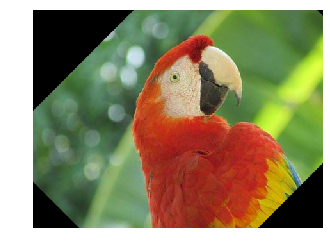

In [4]:
im = imread("../images/parrot.png")
tform = SimilarityTransform(scale=0.9, rotation=np.pi/4, \
                            translation=(im.shape[0]/2, -100))
warped = warp(im, tform)

plt.imshow(warped), plt.axis('off')
plt.show()

랜덤 가우사안 잡음 추가

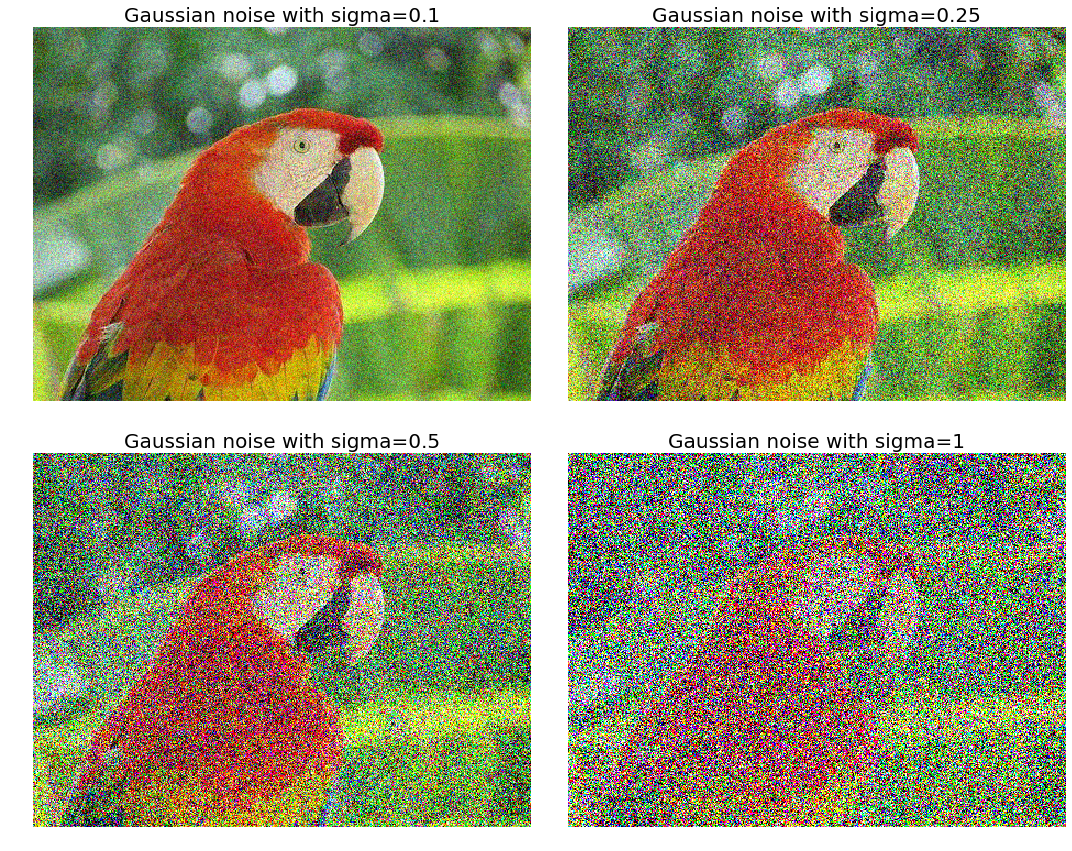

In [7]:
im = img_as_float(imread("../images/parrot.png"))
sigmas = [0.1, 0.25, 0.5, 1]

plt.figure(figsize=(15,12))
for i in range(4):
    noisy = random_noise(im, var=sigmas[i]**2)
    plt.subplot(2,2,i+1), plt.imshow(noisy), plt.axis('off')
    plt.title('Gaussian noise with sigma=' + str(sigmas[i]), size=20)
    plt.tight_layout()

plt.show()

윤곽선 그리기

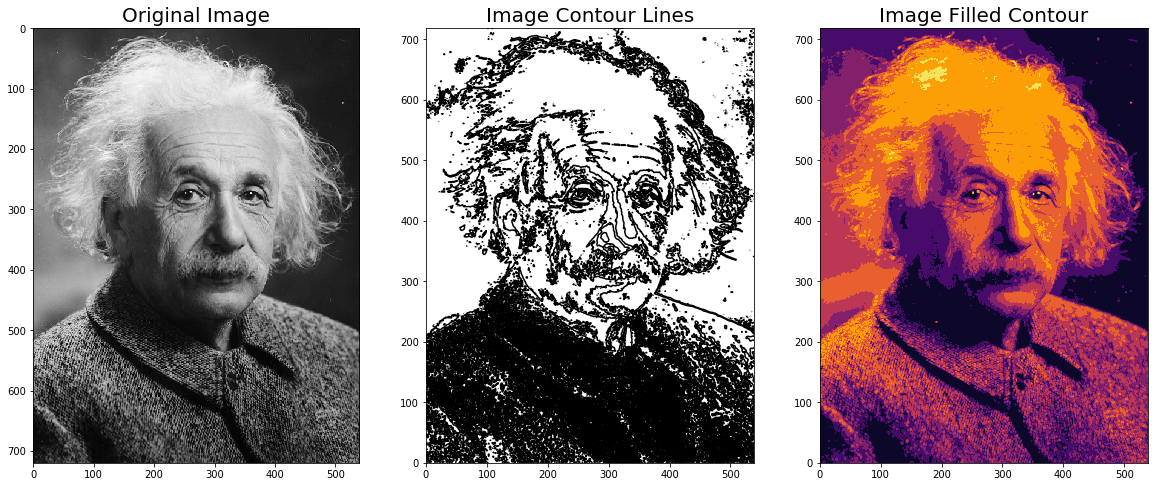

In [10]:
im = color.rgb2gray(imread("../images/einstein.jpg")) 

plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image', size=20)
plt.subplot(132), plt.contour(np.flipud(im), colors='k',levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour', size=20),
plt.contourf(np.flipud(im), cmap='inferno')
plt.show()